<a href="https://colab.research.google.com/github/nmaguette/machine_learning_workshops/blob/master/D1_3_2_Tree_based_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tree-based Methods
We are going to see in this practice how to build different models (simple tree, random forest...) for a classification problem. 

For this practice we are using "adult" dataset that we extracted from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) of open source datasets. This site provides a lot of datasets which can be very useful to build simple models on real data as we are going to do during this practice.




## Importing data 

The prediction task we have is to determine if a person makes more than 50K a year based on multiple feature variables: age, educational level, workclass, sex, race...

We have provided the list of column names below. 

**1- Import train and test datasets from the urls:**

train_set:  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

test_set: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

Make sure you give the column names provided in the list *names*


In [1]:
import pandas as pd


column_names = ["age", "workclass","fnlwgt", "education","education-num", "marital-status", "occupation", "relationship",
         "race","sex", "capital-gain", "capital-loss","hours-per-week","native-country","income"]

train_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

train_data = pd.read_csv(train_data_url, sep=",", header=None, names=column_names)
test_data = pd.read_csv(test_data_url, sep=",", header=None, names=column_names)

print(type(train_data))

<class 'pandas.core.frame.DataFrame'>


## Data preprocessing

Take a look at you at the two datasets. What do you notice on the test data ? Make the necessary changes. 

In [2]:
# train dataset
print('train_data shape:', train_data.shape)
train_data.head()

train_data shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# test dataset
print('test_data shape:', test_data.shape)

pd.concat([test_data.head(3), test_data.tail(3)])

test_data shape: (16282, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


<font color='green'>We can observe that the first row of the test_data is all composed of NaN values, so we can delete this row.
</font>

In [4]:
# make changes 
test_data = test_data[1:]

test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


**3-The variable to be learned is "income". 
Get all its the possible values from training and test datasets.** 
Tip: use the function unique


In [5]:
print("Possible values for target feature \"income\" in the training dataset :\n", train_data['income'].unique())
print("Possible values for target feature \"income\" in the test dataset :\n", test_data['income'].unique())

Possible values for target feature "income" in the training dataset :
 [' <=50K' ' >50K']
Possible values for target feature "income" in the test dataset :
 [' <=50K.' ' >50K.']


We will now transform the "income" variable to a binary one: 1 if  the income is <=50K and 0 otherwise. 

**4-Write a function binarize() that does the transformation for one string and then apply it to the whole dataset.** 


In [6]:
def binarize(income):
    if "<=50K" in str(income):
      return 1
    return 0

train_data["income"] = train_data["income"].apply(binarize)
test_data["income"] = test_data["income"].apply(binarize)

print(train_data["income"])
print(test_data["income"])
pd.concat([test_data.head(3), test_data.tail(3)])

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    0
32558    1
32559    1
32560    0
Name: income, Length: 32561, dtype: int64
1        1
2        1
3        0
4        0
5        1
        ..
16277    1
16278    1
16279    1
16280    1
16281    0
Name: income, Length: 16281, dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,1
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,1
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,0
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,1
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,1
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,0


**5-Remove columns with names "fnlwgt", "education" training and test datasets. We remove them because education is redundant with "education-num"	and "fnlwgt" is not relevant for out model.**

In [7]:
print('train_data shape BEFORE:', train_data.shape)
print('test_data shape BEFORE:', test_data.shape)

train_data = train_data.drop(['fnlwgt', 'education'], axis=1)
test_data = test_data.drop(['fnlwgt', 'education'], axis=1)

# check that columns have been removed correctly in training and testing datasets
print('\ntrain_data shape AFTER:', train_data.shape)
print('test_data shape AFTER:', test_data.shape, '\n')

train_data shape BEFORE: (32561, 15)
test_data shape BEFORE: (16281, 15)

train_data shape AFTER: (32561, 13)
test_data shape AFTER: (16281, 13) 



We will continue processing of the data: 

**6-Check missing values in the data by counting values of each column (use function count() or describe())**

In [8]:
print("train_data values count:\n", train_data.count(), "\ntrain_data total values:", train_data.shape[0])
print("\ntest_data values count:\n", test_data.count(), "\ntest_data total values:", test_data.shape[0])

# other method
#print(train_data.isna().sum())
#print(test_data.isna().sum())

train_data values count:
 age               32561
workclass         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64 
train_data total values: 32561

test_data values count:
 age               16281
workclass         16281
education-num     16281
marital-status    16281
occupation        16281
relationship      16281
race              16281
sex               16281
capital-gain      16281
capital-loss      16281
hours-per-week    16281
native-country    16281
income            16281
dtype: int64 
test_data total values: 16281


In [9]:
train_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.759190
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [10]:
test_data.describe()

,education-num,capital-gain,capital-loss,hours-per-week,income
count,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,10.072907,1081.905104,87.899269,40.392236,0.763774
std,2.567545,7583.935968,403.105286,12.479332,0.424776
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,0.000000,0.000000,40.000000,1.000000
50%,10.000000,0.000000,0.000000,40.000000,1.000000
75%,12.000000,0.000000,0.000000,45.000000,1.000000
max,16.000000,99999.000000,3770.000000,99.000000,1.000000


We also notice that the column age, which supposed to be numeric, is not numeric since it does not appear in describe() of test_data. 

**7-Change type of this column to integer in test_data.**

In [11]:
test_data["age"] = test_data["age"].astype(int)
test_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,10.072907,1081.905104,87.899269,40.392236,0.763774
std,13.849187,2.567545,7583.935968,403.105286,12.479332,0.424776
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000,1.000000


We have finished data cleaning we can move to prepare data for the model.

**8- Split train dataset into x_train  and y_train where y_train contains the income and x_train all the other columns.** 

In [12]:
x_train = train_data.iloc[:,:-1]
print(x_train.shape)
x_train.head()

(32561, 12)


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [13]:
y_train = train_data['income']
print(y_train.shape)
y_train.head()

(32561,)


0    1
1    1
2    1
3    1
4    1
Name: income, dtype: int64

**9-Do the same thing to the test data.**

In [14]:
x_test = test_data.iloc[:,:-1]
y_test = test_data['income']
print(x_test.shape)
print(y_test.shape)

(16281, 12)
(16281,)


**10-Try to build a a simple tree using  DecisionTreeClassifier from sklearn.tree and fit it on training data.**




In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

ValueError: ignored

**11-What is the issue you have encounetered?**





<font color='green'>When we try to fit our model, we get an error "
ValueError: could not convert string to float: ' State-gov'".\
This error is because fit() does not accept Strings. In its documentation, we can see that the training input samples will be converted internally into dtype=np.float32.\
\
So we have to do some encoding before using fit.\
There are several classes that can be used :

*  **LabelEncoder** : turn the string into incremental value
*  **OneHotEncoder** : use One-of-K algorithm to transform the string into integer
</font>

We are going to test two types of encoders: 

Label encoder: counts the number (n) of categories we have and then encodes each one of the different possible values with a number between 0 and n-1. 
This encoder only replaces the original with the encoded data. So the dimension of the data is not changed. 

Example: 

We will apply a label encoder!to a list: ["a", "b", "b", "a", "c"]

In [16]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
l = ["a", "b", "b", "a", "c" ]
# We first fit the model to recognize the classes 
le.fit(l)
print("The classes are:", le.classes_)
# After fitting the encoder we use it to transform the data 
le.transform(l)

The classes are: ['a' 'b' 'c']


array([0, 1, 1, 0, 2])

A second famous encoder is One Hot encoder: 

For a givern categorical column every possible value results in a new column. Then, for each row, we put 1 in the column with the name of the category value we have and 0 in the others. 

We generally have 2 choices to proceed with this type of encoding: 

*   OneHotEncoder from sklearn.preprocessing
*   get_dummies() function from pandas

Using the first option creates additional complications when we have both categorical and non categorical variables in our dataset, which is the case here. That's why it is prefereable to use get_dummies. 


Example: 

We will apply One Hot encoder to the same list:  ["a", "b", "b", "a", "c" ]

In [17]:
l = ["a", "b", "b", "a", "c" ]
pd.get_dummies(l)

,a,b,c
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1


For the information there is also the get_dummies() function from pandas library that provides one hot encoding. It is slightly different in handling some cases, that's why we prefer to use the first method.

## Building model

We have seen that we have to encode the data before training the model.  
We will define 2 models: one with label encoding and another with one hot encoding.

### Using label encoding

Encode train and test data.

First we will combine train and test data to fit the encoder (otherwise we would have problems transforming data because of eventual unrecognized categories) 
 

**12-Concatenate training and test data and make sure there are no problems.**

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
combined_data = pd.concat([x_train,x_test])
print("combined_data shape:", combined_data.shape)
combined_data.head()

combined_data shape: (48842, 12)


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


**13- Apply label encoding to combined data.** 

To avoid having to encode each column independently, dataframe.apply() as indicated after.

In [19]:
encoded_combined_data = combined_data.copy()
encoded_combined_data[["workclass","marital-status","occupation",
                      "relationship","race","sex",
                      "native-country"]] = combined_data.select_dtypes(exclude=['int64', int, float]).apply(le.fit_transform)

encoded_combined_data.head(8)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,13.0,4,1,1,4,1,2174.0,0.0,40.0,39
1,50,6,13.0,2,4,0,4,1,0.0,0.0,13.0,39
2,38,4,9.0,0,6,1,4,1,0.0,0.0,40.0,39
3,53,4,7.0,2,6,0,2,1,0.0,0.0,40.0,39
4,28,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
5,37,4,14.0,2,4,5,4,0,0.0,0.0,40.0,39
6,49,4,5.0,3,8,1,2,0,0.0,0.0,16.0,23
7,52,6,9.0,2,4,0,4,1,0.0,0.0,45.0,39


**14- Split the data again using training and test size from train_data and test_data.**

In [20]:
print("Checking again\ntrain_data number of rows:", train_data.shape[0])
print("test_data number of rows:", test_data.shape[0])
print("combined_data number of rows:", encoded_combined_data.shape[0])
train_size = train_data.shape[0]
test_size = test_data.shape[0]

encoded_x_train = encoded_combined_data[:train_size] 
encoded_x_test = encoded_combined_data[train_size:]

print("\nAGAIN:\nencoded_train_data number of rows:", encoded_x_train.shape[0])
print("encoded_test_data number of rows:", encoded_x_test.shape[0])

encoded_x_train.head(7)

Checking again
train_data number of rows: 32561
test_data number of rows: 16281
combined_data number of rows: 48842

AGAIN:
encoded_train_data number of rows: 32561
encoded_test_data number of rows: 16281


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,13.0,4,1,1,4,1,2174.0,0.0,40.0,39
1,50,6,13.0,2,4,0,4,1,0.0,0.0,13.0,39
2,38,4,9.0,0,6,1,4,1,0.0,0.0,40.0,39
3,53,4,7.0,2,6,0,2,1,0.0,0.0,40.0,39
4,28,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
5,37,4,14.0,2,4,5,4,0,0.0,0.0,40.0,39
6,49,4,5.0,3,8,1,2,0,0.0,0.0,16.0,23


Now we can finally train our model.
First we won't use any of the parameters. 

**15-Fit model using DecisionTreeClassifier function with default parameter values.**

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(encoded_x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**16- Use the fitted model to predict training data and check accuracy.** 


In [22]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(encoded_x_train)
print("Training accuracy is:", accuracy_score(y_pred=y_train_pred, y_true=y_train))

Training accuracy is: 0.976413500813857


Our algorithm has an excellent accuracy on training data. 

**17-Predict now test data and compute accuracy. Compare training accuracy and test accuracy. What is the conclusion we can make ?** 


In [23]:
y_test_pred = model.predict(encoded_x_test)
print("Test accuracy is:", accuracy_score(y_test_pred, y_test))

Test accuracy is: 0.811068116209078


### Using One Hot Encoder

Now we are going to do the same steps  but using one hot encoding. As we have said before we prefer to use get_dummies function. 

**18- Encode data using One Hot Encoding and split data to test and train**


In [24]:
encoded_combined_data2 = pd.get_dummies(combined_data)

# split the data to again to train and test
encoded_x_train2 = encoded_combined_data[:train_size] 
encoded_x_test2 = encoded_combined_data[train_size:]

print("combined_data number of rows:", encoded_combined_data2.shape[0])
print("encoded_train_data number of rows:", encoded_x_train2.shape[0])
print("encoded_test_data number of rows:", encoded_x_test2.shape[0])

encoded_x_train2.head(4)

combined_data number of rows: 48842
encoded_train_data number of rows: 32561
encoded_test_data number of rows: 16281


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,13.0,4,1,1,4,1,2174.0,0.0,40.0,39
1,50,6,13.0,2,4,0,4,1,0.0,0.0,13.0,39
2,38,4,9.0,0,6,1,4,1,0.0,0.0,40.0,39
3,53,4,7.0,2,6,0,2,1,0.0,0.0,40.0,39


**19- Fit a new model on encoded data.**

In [25]:
model_2 = DecisionTreeClassifier()
model_2.fit(encoded_x_train2, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**20- Predict train and test labels using the new model and compute accuracy score each time. Comment on results.**


In [26]:
# Predicting training labels
y_train_pred = model_2.predict(encoded_x_train2)
print("Training accuracy is:", accuracy_score(y_pred=y_train_pred, y_true=y_train))
# Predicting test labels
y_test_pred = model_2.predict(encoded_x_test2)
print("Test accuracy is:", accuracy_score(y_pred=y_test_pred, y_true=y_test))

Training accuracy is: 0.976413500813857
Test accuracy is: 0.8127879122903998


In both encoding methods, we have high training accuracies with significantly lower test accuracies. This means we have some overfitting on our data. 


How do we normally reduce overfitting in case of Decision Tree methods ?

The most common way to reduce a tree is by pruning it. However, there is no built-in method that implement s cost complexity pruning for example, so unless if we want to properly define a pruning method we need to do changes that are slightly beyond the objective of this practice. 

Instead we have a simple alternative which is quite simple: when declaring the model with *DecisionTreeClassifier* function we can add an optional parameter *min_impurity_decrease*. This parameter controls the minimum decrease in criterion to perform a split. This means that if the best split in a given node provides a decrease inferior to this value, we will not allow the split to happen, and the node becomes a leaf node.

### Improving model

**21- Define a function which takes a *min_impurity_decrease* value, trains using this value and returns training and test accuracy scores in a form of a list of 2 values. Test the function with some values.**

In [27]:
def train_pruned_tree(min_decrease):
  model_2 = DecisionTreeClassifier(min_impurity_decrease=min_decrease)
  model_2.fit(encoded_x_train, y_train)
  y_train_pred = model_2.predict(encoded_x_train)
  train_accuracy = accuracy_score(y_pred=y_train_pred, y_true=y_train)
  y_test_pred = model_2.predict(encoded_x_test)
  test_accuracy = accuracy_score(y_pred=y_test_pred, y_true=y_test)
  return ([train_accuracy, test_accuracy])

# example 
train_pruned_tree(0.04)

[0.7591904425539756, 0.7637737239727289]

**22- Train multiple models using varying values of *min_decrease* in the function and plot two lines: one for training accuracy scores and another for test accuracy scores.**
Use logarithmic scale for *min_decrease*.

In [28]:
import matplotlib.pyplot as plt
import numpy as np

rangeofvalues = 10.0**(np.array(range(-7,2)))
print(rangeofvalues)
num_iter = rangeofvalues*np.ones(len(rangeofvalues))
train_accuracies_hist=[]
test_accuracies_hist=[]
res=[]
for i in rangeofvalues:
  train_accuracies, test_accuracies = train_pruned_tree(i)
  train_accuracies_hist.append(train_accuracies)
  test_accuracies_hist.append(test_accuracies)

[1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


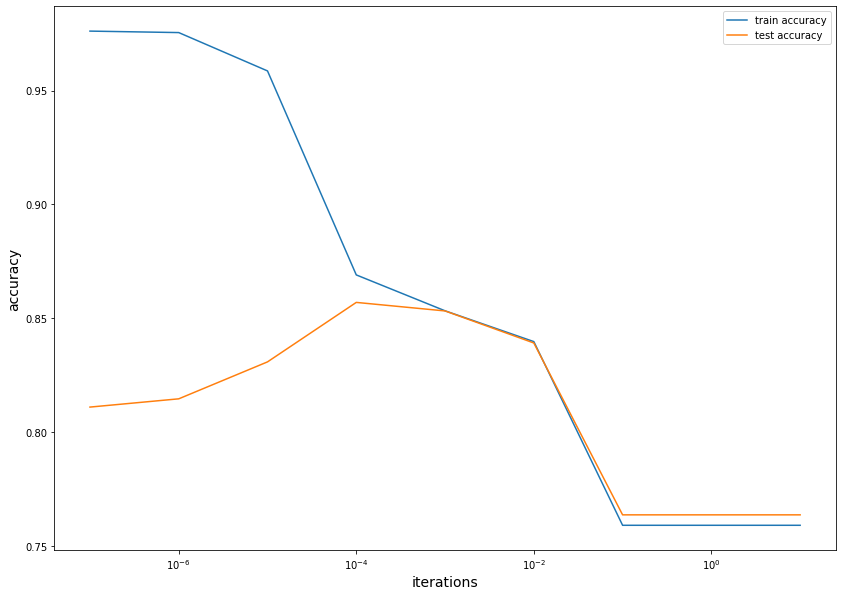

In [29]:
plt.figure(figsize=(14,10))
plt.plot(num_iter, train_accuracies_hist, label='train accuracy')
plt.plot(num_iter, test_accuracies_hist, label='test accuracy')
plt.xlabel('iterations', fontsize = 14)
#plt.xlim((-0.0001,0.004))
#plt.xlim((10^-4,0.1))
plt.xscale("log")
plt.ylabel('accuracy', rotation = 90, fontsize = 14)
plt.legend(loc='best')
plt.show()

 **23- Comment on the results you get and choose an optimal value for *min_decrease*.** 



<font color='green'>We can see that at **min_impurity_decrease=0**, we have a strong overfitting.\
With **min_impurity_decrease=0.0001**, the model is well fitted and we have an accuracy score of 85% both for training and testing dataset. This value seems to be the optimal value for min_decrease.\
But as we increase the value of min_impurity_decrease, the accuracy starts to drop considerably.
</font>

In [30]:
train_pruned_tree(0.0001)

[0.8690765025644176, 0.8570112400958172]

### Random Forest model

We have seen how to improve a simple Decision Tree using varying parameters of the model. However, this is not the most common way to get improve tree based models. A more common method is to use Random Forests. The only reason we might not want random forest is to keep interpretability guaranteed by a single tree.

In the same way as before, we will build a Random Forest model. 

We won't change default parameters in the first place. 

**24- Train a Random Forest on the data and get training and accuracy scores. Comment on the results.** 



In [31]:
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier()
model_3.fit(encoded_x_train, y_train)

y_train_pred = model_3.predict(encoded_x_train)
print("Training accuracy is:", accuracy_score(y_pred=y_train_pred, y_true=y_train))
# Predicting test labels
y_test_pred = model_3.predict(encoded_x_test)
print("Test accuracy is:", accuracy_score(y_pred=y_test_pred, y_true=y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training accuracy is: 0.9687663155308498
Test accuracy is: 0.8404274921687857


### Improving model



There are multiple parameters we can change to improve our Random Forest model. But if we vary all hyperparameters, it might take a very long time to find the optimal combination, thsus we are only going use 3 of them:

*   *min_impurity_decrease*: same as before
*   *n_estimators*: number of trees in our Random Forest
*   *max_features*: number of features we use in each iteration of the Random Forest algorithm (cf. lecture)

For  *min_impurity_decrease* we will use the same optimal value as before (it appears it is also optimal here) 0.00001.

**25-Implement a Random Forest model using this value.**

In [32]:
model_3 = RandomForestClassifier(min_impurity_decrease=0.00001)
model_3.fit(encoded_x_train, y_train)

y_train_pred = model_3.predict(encoded_x_train)
print("Training accuracy is:", accuracy_score(y_pred=y_train_pred, y_true=y_train))
# Predicting test labels
y_test_pred = model_3.predict(encoded_x_test)
print("Test accuracy is:", accuracy_score(y_pred=y_test_pred, y_true=y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training accuracy is: 0.9230981849451798
Test accuracy is: 0.8578097168478594


To find the best combination of hyperarameters we have chosen to change, we are going simply train the model on different combinations and we pick the best combination.

**26- Define possible combinations of n_estimators and max_features and use.**

Tip: what might be useful is to define a function that a takes a  combination as an input then fits the model and gives accuracy scores as output.

In [33]:
# we define the function just like train_pruned_tree function

def train_for_comb(n_estimators, max_features):
    model = RandomForestClassifier(min_impurity_decrease=0.00001,
                                   n_estimators=n_estimators,
                                   max_features=max_features)
    model.fit(encoded_x_train, y_train)
    y_train_pred = model.predict(encoded_x_train)
    train_accuracy = accuracy_score(y_pred=y_train_pred, y_true=y_train)
    y_test_pred = model.predict(encoded_x_test)
    test_accuracy = accuracy_score(y_pred=y_test_pred, y_true=y_test)
    return ([train_accuracy, test_accuracy]) 
 
n_estimators_list = [50,100,200,300,500]
max_features_list = [int(i) for i in np.arange(1,5)]  #linspace(1,encoded_x_train.shape[1], 10)]

# dictionary where we are going to store accuracy scores for each combination   
accuracy_dic ={}

# loop to compute all accuracies
for n_estimators in n_estimators_list:
    for max_features in max_features_list:
        accuracy_dic[(n_estimators, max_features)]=train_for_comb(n_estimators, max_features)
        
print(accuracy_dic)

{(50, 1): [0.9000952059211941, 0.8616792580308335], (50, 2): [0.9157274039495101, 0.8641975308641975], (50, 3): [0.9281348852922208, 0.861249309010503], (50, 4): [0.936580571849759, 0.8606965174129353], (100, 1): [0.9010779767206167, 0.8621092070511639], (100, 2): [0.9147139215626056, 0.8628462625145875], (100, 3): [0.9280734621172568, 0.8622934709170198], (100, 4): [0.9383618439237125, 0.8603279896812235], (200, 1): [0.9004023217960136, 0.862600577360113], (200, 2): [0.9158809618869199, 0.863767581843867], (200, 3): [0.9281041737047387, 0.8621092070511639], (200, 4): [0.9392524799606892, 0.8606350961243167], (300, 1): [0.8997880900463745, 0.8623548922056384], (300, 2): [0.9166180399864869, 0.863767581843867], (300, 3): [0.9283191548171125, 0.8629691050918248], (300, 4): [0.9389146524983877, 0.8594680916405626], (500, 1): [0.900125917508676, 0.8629076838032061], (500, 2): [0.9164644820490772, 0.8630305263804434], (500, 3): [0.9280734621172568, 0.8624777347828757], (500, 4): [0.93903749

*Optional*

**27- Instead of manually looking for the best we can look for the best split. Use GridSearchCV to find it.** 

For help, consult [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). 


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50,100,200],#300,500],
              'max_features': [int(i) for i in np.arange(1,4)],  #np.linspace(1,encoded_x_train.shape[1], 10)],
              'min_impurity_decrease': [0.00001]}

model = RandomForestClassifier()
gridsearch = GridSearchCV(model, param_grid, cv = 5, verbose= 1)
gridsearch.fit(encoded_x_train, y_train)

print("The best parameters are:\n%s" % (gridsearch.best_params_)) 
print("The best score is:\n%s" % (gridsearch.best_score_))

y_train_pred = gridsearch.predict(encoded_x_train)
y_test_pred = gridsearch.predict(encoded_x_test)

print("Training Accuracy:", accuracy_score(y_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(y_test_pred, y_test))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.2min finished


The best parameters are:
{'max_features': 3, 'min_impurity_decrease': 1e-05, 'n_estimators': 100}
The best score is:
0.8650225730167992
Training Accuracy: 0.9282270200546666
Testing Accuracy: 0.8640132669983416
